# Comparison between this and 300wlp

Creates collages with side by side images.

In [1]:
import os
from importlib import reload
from PIL import Image
import numpy as np

In [2]:
from face3drotationaugmentation import datasetreader
import face3drotationaugmentation.dataset300wlp as dataset300wlp
import face3drotationaugmentation.vis as vis

In [3]:
#reload(dataset300wlp)
#reload(datasetreader)

In [4]:
ds300wlp = dataset300wlp.Dataset300WLP(os.path.join(os.environ['DATADIR'],'300W-LP.zip'), only_originals=False)

In [5]:
dsrepro = datasetreader.Hdf5PoseDataset(os.path.join(os.environ['DESTINATION_DATADIR'],'welter-large-poses-v8.h5'))

In [6]:
def map_to_repro_name(name : str):
    # Unfortunate inconsistency there ...
    prefix, number = name.rsplit('_',maxsplit=1)
    return f'{prefix}_{int(number):02d}'

repro_name2idx= { f:i for i,f in enumerate(dsrepro.filenames) }
_300wlp_idx_to_repro_idx = [ (i,repro_name2idx.get(map_to_repro_name(f),None)) for i,f in enumerate(ds300wlp.filenames) ]
_300wlp_idx_to_repro_idx = { i:j for i,j in _300wlp_idx_to_repro_idx if j is not None }

In [7]:
def visu(sample):
    img = sample['image'].copy()
    vis.draw_pose(img, sample, 255, 2)
    return img

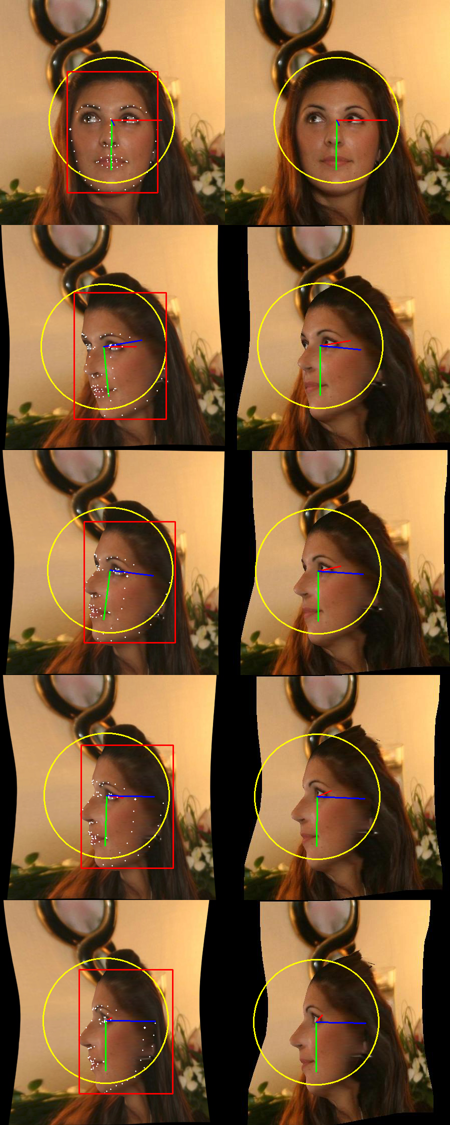

In [8]:
def generate_collage(_300wlp_idx, count, every):
    pics = []
    for i in range(_300wlp_idx,_300wlp_idx+count*every,every):
        repro_sample = dsrepro[_300wlp_idx_to_repro_idx[i]]
        orig_sample = ds300wlp[i]

        a = visu(repro_sample)
        b = visu(orig_sample)

        img = np.concatenate([a,b], axis=1)

        pics.append(img)

    img = np.concatenate(pics, axis=0)

    h, w, _ = img.shape
    img = Image.fromarray(img).resize((w//2,h//2))
    return img

display(generate_collage(1008, 5, 2))

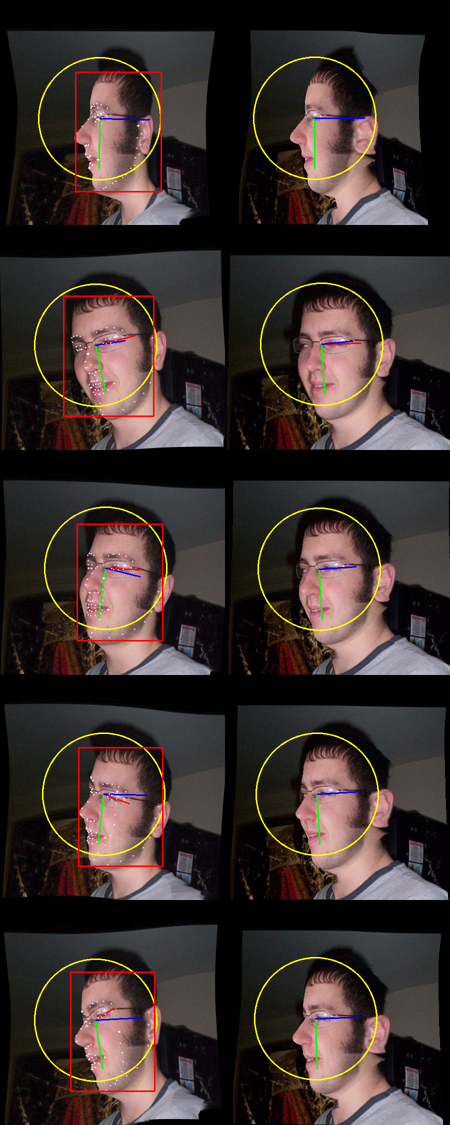

In [9]:
display(generate_collage(100, 5, 2))

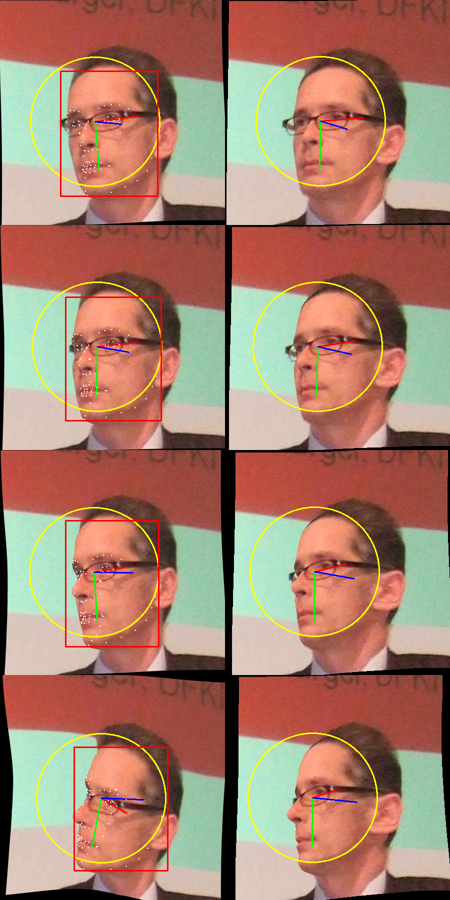

In [10]:
display(generate_collage(1000, 4, 2))